In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/archive/creditcard.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


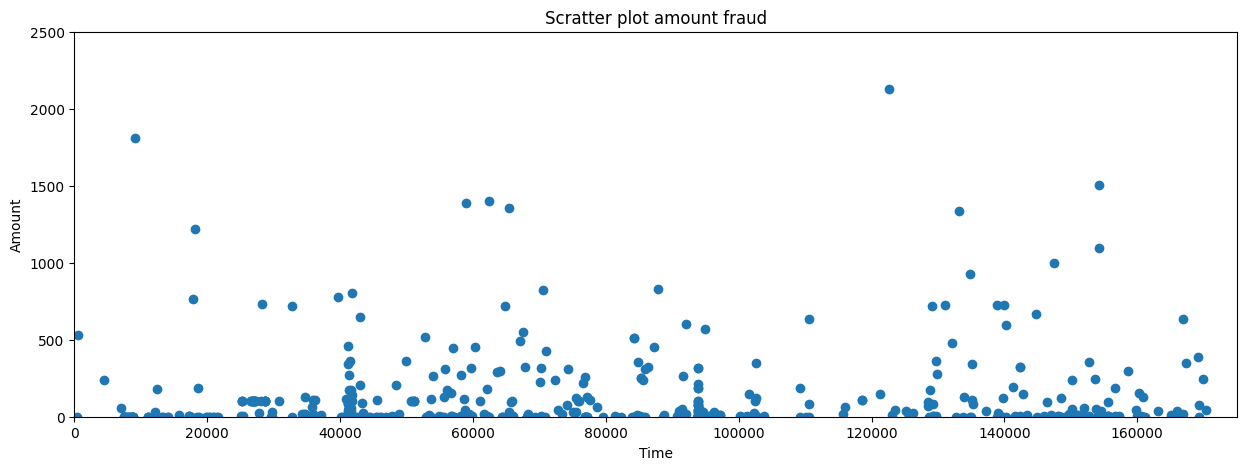

In [ ]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [ ]:
df_corr = df.corr()

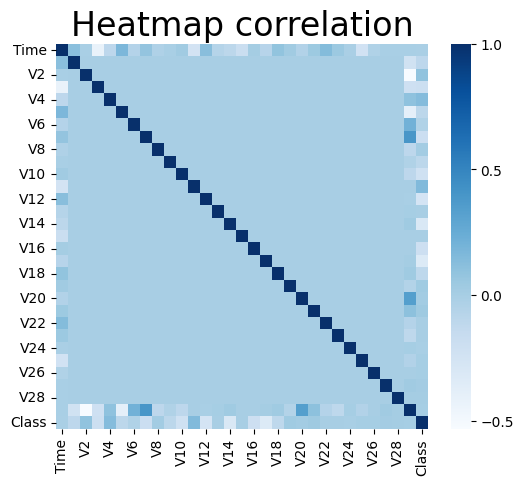

In [ ]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
df_train_all = df[0:150000] # We divide the original dataset in two parts
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


<ipython-input-16-39c95a8ceb00>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds.


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
# with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(classifier.intercept_, classifier.coef_)

[-2.82319074] [[ 0.04590614  0.01947544 -0.06964219  0.79069912 -0.15411778 -0.09545585
   0.39979702 -0.98436511 -0.33955471 -0.72798143 -0.00670827 -0.91685762
  -0.44839247 -1.51145835 -0.09417792 -0.33980131 -0.46800069  0.43684054
   0.02938325  0.27464735  0.58058243  0.60722898 -0.43896549  0.0762878
   0.06009191 -0.55059017  0.00534268  0.37848577 -0.00280626]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9645868465430016


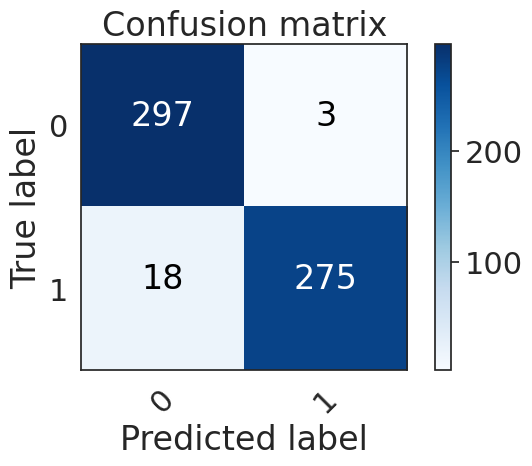

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

In [ ]:
# plot_confusion_matrix(cm,class_names)
import itertools

In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.03541315345699832 
Mean Absolute Percentage error : 0.03035413153456998
Mean Squared Error : 0.03541315345699832
R Squared Error: 0.8583276450511945


<ipython-input-34-5f72e4baadad>:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))


In [ ]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       300
           1       0.99      0.94      0.96       293

    accuracy                           0.96       593
   macro avg       0.97      0.96      0.96       593
weighted avg       0.97      0.96      0.96       593



In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train= oversample.fit_resample(X_train,y_train)

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(classifier.intercept_, classifier.coef_)

[-2.72617492] [[ 0.01997964  0.026001   -0.12036788  0.78487702 -0.16215012 -0.07218051
   0.39172197 -0.98261328 -0.30789364 -0.69305886 -0.0370254  -0.90073413
  -0.45219615 -1.50160175 -0.11115717 -0.34368976 -0.4461919   0.43354601
  -0.00392504  0.29641867  0.56034864  0.65500729 -0.42918224  0.08759751
   0.0133528  -0.50841685 -0.01120527  0.35474103 -0.00300528]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn after applying SMOTE: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn after applying SMOTE: 0.965


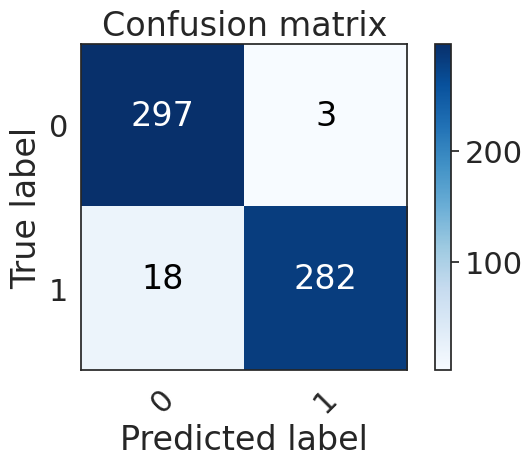

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

In [ ]:
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       300
           1       0.99      0.94      0.96       300

    accuracy                           0.96       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.96      0.96       600



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.035 
Mean Absolute Percentage error : 0.03
Mean Squared Error : 0.035
R Squared Error: 0.86


<ipython-input-42-5f72e4baadad>:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))


In [ ]:
pred = classifier.predict(X_test_all)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_test_all,y_test_all)))

Accuracy from sk-learn: 0.8958956137292574


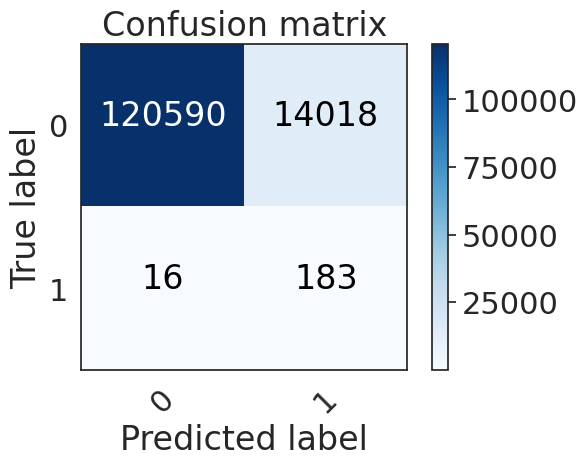

In [ ]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm,class_names)